In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | luanda
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | tuktoyaktuk
Processing Record 7 of Set 1 | hay river
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | muros
Processing Record 10 of Set 1 | bonthe
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | magadan
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | takoradi
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | yar-sale
Processing Record 19 of Set 1 | mayo
Processing Record 20 of Set 1 | tucuman
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | banda

Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | rolla
Processing Record 41 of Set 4 | acari
Processing Record 42 of Set 4 | airai
Processing Record 43 of Set 4 | santa cruz
Processing Record 44 of Set 4 | roald
Processing Record 45 of Set 4 | tanggu
Processing Record 46 of Set 4 | kaka
Processing Record 47 of Set 4 | zhigansk
Processing Record 48 of Set 4 | wajir
Processing Record 49 of Set 4 | leningradskiy
Processing Record 50 of Set 4 | faya
Processing Record 1 of Set 5 | aitape
Processing Record 2 of Set 5 | tezu
Processing Record 3 of Set 5 | nantucket
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | kaputa
Processing Record 6 of Set 5 | kandrian
Processing Record 7 of Set 5 | ekuvukeni
Processing Record 8 of Set 5 | bud
Processing Record 9 of Set 5 | adre
Processing Record 10 of Set 5 | pampa
Processing Record 11 of Set 5 | beloha
Processing Record 12 of Set 5 | katobu
Processing Record 13 of Set 5 | bekhtery
Processing Record 14 of 

Processing Record 28 of Set 8 | capim grosso
Processing Record 29 of Set 8 | cuamba
Processing Record 30 of Set 8 | dickson
Processing Record 31 of Set 8 | mbuguni
Processing Record 32 of Set 8 | deniliquin
Processing Record 33 of Set 8 | marawi
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | weihai
Processing Record 36 of Set 8 | shitanjing
Processing Record 37 of Set 8 | te anau
Processing Record 38 of Set 8 | novo aripuana
Processing Record 39 of Set 8 | balkhash
Processing Record 40 of Set 8 | tiksi
Processing Record 41 of Set 8 | ig
City not found. Skipping...
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | dongli
Processing Record 44 of Set 8 | graaff-reinet
Processing Record 45 of Set 8 | princeton
Processing Record 46 of Set 8 | paita
Processing Record 47 of Set 8 | westport
Processing Record 48 of Set 8 | mount darwin
Processing Record 49 of Set 8 | banjar
Processing Record 50 of Set 8 | priby

Processing Record 16 of Set 12 | culebra
Processing Record 17 of Set 12 | yuanping
Processing Record 18 of Set 12 | moose factory
Processing Record 19 of Set 12 | victoria
Processing Record 20 of Set 12 | xai-xai
Processing Record 21 of Set 12 | maridi
Processing Record 22 of Set 12 | tual
Processing Record 23 of Set 12 | svetlogorsk
Processing Record 24 of Set 12 | rabaul
Processing Record 25 of Set 12 | half moon bay
Processing Record 26 of Set 12 | egvekinot
Processing Record 27 of Set 12 | usila
City not found. Skipping...
Processing Record 28 of Set 12 | gambela
Processing Record 29 of Set 12 | tay ninh
Processing Record 30 of Set 12 | lavrentiya
Processing Record 31 of Set 12 | kudat
Processing Record 32 of Set 12 | wade hampton
Processing Record 33 of Set 12 | daru
Processing Record 34 of Set 12 | riverbank
Processing Record 35 of Set 12 | lagoa
Processing Record 36 of Set 12 | serenje
Processing Record 37 of Set 12 | karabuk
Processing Record 38 of Set 12 | lingao
Processing Re

In [10]:
len(city_data)

570

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.80,81,75,4.61,AR,2021-04-17 04:59:22
1,Hobart,-42.8794,147.3294,62.60,51,75,13.80,AU,2021-04-17 04:56:01
2,Luanda,-8.8368,13.2343,76.21,87,71,7.20,AO,2021-04-17 05:04:20
3,Dikson,73.5069,80.5464,-1.48,82,99,5.77,RU,2021-04-17 05:04:21
4,Tuktoyaktuk,69.4541,-133.0374,19.40,86,90,2.30,CA,2021-04-17 04:59:25
5,Hay River,60.8156,-115.7999,39.20,65,100,3.31,CA,2021-04-17 05:04:21
6,Rikitea,-23.1203,-134.9692,77.74,67,100,9.95,PF,2021-04-17 05:00:18
7,Muros,42.7762,-9.0603,46.00,66,66,3.00,ES,2021-04-17 05:04:21
8,Bonthe,7.5264,-12.5050,78.96,87,75,6.80,SL,2021-04-17 05:04:22
9,Bethel,41.3712,-73.4140,41.00,84,88,9.35,US,2021-04-17 05:00:22


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-17 04:59:22,-54.8000,-68.3000,42.80,81,75,4.61
1,Hobart,AU,2021-04-17 04:56:01,-42.8794,147.3294,62.60,51,75,13.80
2,Luanda,AO,2021-04-17 05:04:20,-8.8368,13.2343,76.21,87,71,7.20
3,Dikson,RU,2021-04-17 05:04:21,73.5069,80.5464,-1.48,82,99,5.77
4,Tuktoyaktuk,CA,2021-04-17 04:59:25,69.4541,-133.0374,19.40,86,90,2.30
...,...,...,...,...,...,...,...,...,...
565,Champasak,LA,2021-04-17 05:07:05,14.7500,106.0000,94.30,44,100,2.48
566,Umm Lajj,SA,2021-04-17 05:07:05,25.0213,37.2685,78.80,60,0,2.71
567,Manggar,ID,2021-04-17 05:07:05,-2.8833,108.2667,86.38,62,88,6.60
568,Axim,GH,2021-04-17 05:07:06,4.8699,-2.2405,78.60,83,84,3.13


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

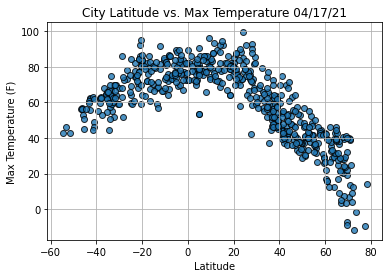

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

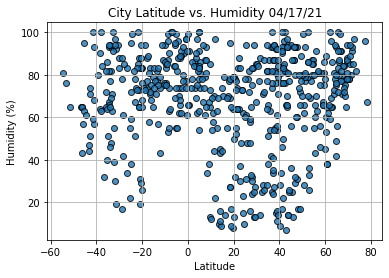

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

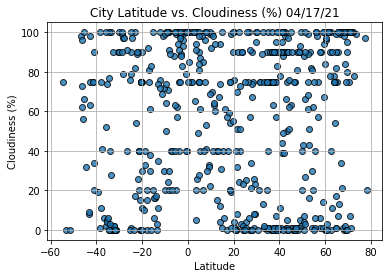

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

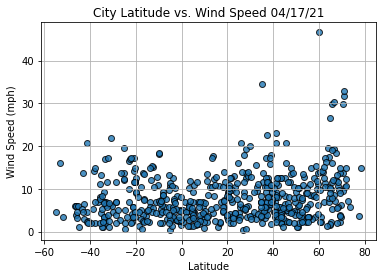

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-17 04:59:22,-54.8000,-68.3000,42.80,81,75,4.61
1,Hobart,AU,2021-04-17 04:56:01,-42.8794,147.3294,62.60,51,75,13.80
2,Luanda,AO,2021-04-17 05:04:20,-8.8368,13.2343,76.21,87,71,7.20
3,Dikson,RU,2021-04-17 05:04:21,73.5069,80.5464,-1.48,82,99,5.77
4,Tuktoyaktuk,CA,2021-04-17 04:59:25,69.4541,-133.0374,19.40,86,90,2.30
...,...,...,...,...,...,...,...,...,...
565,Champasak,LA,2021-04-17 05:07:05,14.7500,106.0000,94.30,44,100,2.48
566,Umm Lajj,SA,2021-04-17 05:07:05,25.0213,37.2685,78.80,60,0,2.71
567,Manggar,ID,2021-04-17 05:07:05,-2.8833,108.2667,86.38,62,88,6.60
568,Axim,GH,2021-04-17 05:07:06,4.8699,-2.2405,78.60,83,84,3.13


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                     Takoradi
Country                        GH
Date          2021-04-17 05:04:22
Lat                        4.8845
Lng                       -1.7554
Max Temp                    78.53
Humidity                       83
Cloudiness                     90
Wind Speed                   4.72
Name: 13, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
565     True
566     True
567    False
568     True
569     True
Name: Lat, Length: 570, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Dikson,RU,2021-04-17 05:04:21,73.5069,80.5464,-1.48,82,99,5.77
4,Tuktoyaktuk,CA,2021-04-17 04:59:25,69.4541,-133.0374,19.40,86,90,2.30
5,Hay River,CA,2021-04-17 05:04:21,60.8156,-115.7999,39.20,65,100,3.31
7,Muros,ES,2021-04-17 05:04:21,42.7762,-9.0603,46.00,66,66,3.00
8,Bonthe,SL,2021-04-17 05:04:22,7.5264,-12.5050,78.96,87,75,6.80


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Dikson,RU,2021-04-17 05:04:21,73.5069,80.5464,-1.48,82,99,5.77
4,Tuktoyaktuk,CA,2021-04-17 04:59:25,69.4541,-133.0374,19.40,86,90,2.30
5,Hay River,CA,2021-04-17 05:04:21,60.8156,-115.7999,39.20,65,100,3.31
7,Muros,ES,2021-04-17 05:04:21,42.7762,-9.0603,46.00,66,66,3.00
8,Bonthe,SL,2021-04-17 05:04:22,7.5264,-12.5050,78.96,87,75,6.80
...,...,...,...,...,...,...,...,...,...
564,Qaqortoq,GL,2021-04-17 05:07:04,60.7167,-46.0333,15.80,38,0,2.30
565,Champasak,LA,2021-04-17 05:07:05,14.7500,106.0000,94.30,44,100,2.48
566,Umm Lajj,SA,2021-04-17 05:07:05,25.0213,37.2685,78.80,60,0,2.71
568,Axim,GH,2021-04-17 05:07:06,4.8699,-2.2405,78.60,83,84,3.13


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-04-17 04:59:22,-54.8000,-68.3000,42.80,81,75,4.61
1,Hobart,AU,2021-04-17 04:56:01,-42.8794,147.3294,62.60,51,75,13.80
2,Luanda,AO,2021-04-17 05:04:20,-8.8368,13.2343,76.21,87,71,7.20
6,Rikitea,PF,2021-04-17 05:00:18,-23.1203,-134.9692,77.74,67,100,9.95
12,Hithadhoo,MV,2021-04-17 04:59:31,-0.6000,73.0833,81.91,61,40,2.62
...,...,...,...,...,...,...,...,...,...
555,Cabinda,AO,2021-04-17 05:07:02,-5.5500,12.2000,75.63,84,100,9.78
558,Sola,VU,2021-04-17 05:07:03,-13.8833,167.5500,82.72,71,17,14.81
559,Mayumba,GA,2021-04-17 05:07:03,-3.4320,10.6554,78.12,89,100,7.20
561,Kimbe,PG,2021-04-17 05:07:04,-5.5502,150.1429,76.64,95,100,3.96


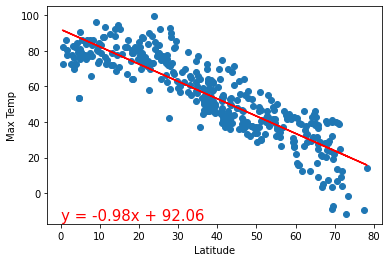

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

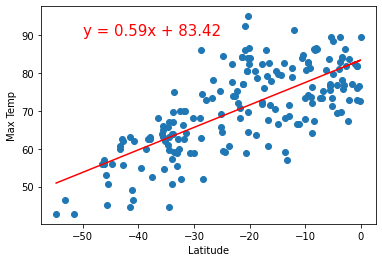

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

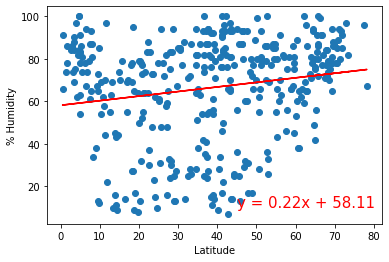

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))

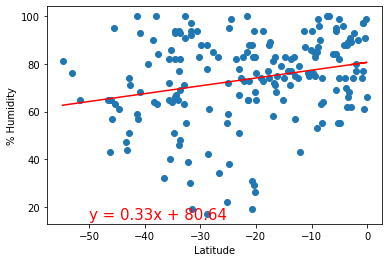

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

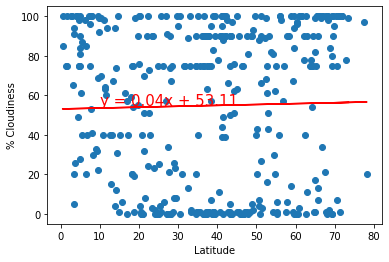

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

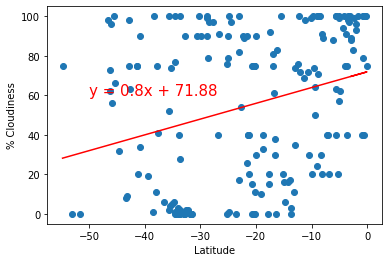

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

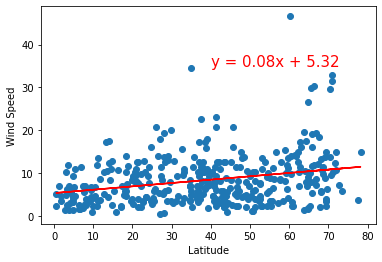

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

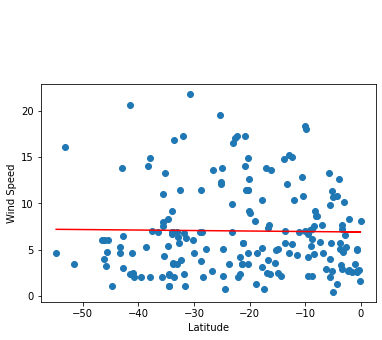

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-30,30))

In [38]:
# # TROUBLE-SHOOTING MISSING TITLES
# 
# # Linear regression on the Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]
# # Call the function.
# plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 'Wind Speed',(-30,30))

In [ ]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

In [ ]:
# LOC METHOD ON DATAFRAME
# 
# Next, filter the maximum temperature column in 
# the city_data_df DataFrame using logical operators 
# to create a new DataFrame with the cities that meet 
# the customer's criteria.
# 
# Recall that you use the loc[] method on the current 
# DataFrame to create a new DataFrame from a current 
# DataFrame. Inside the brackets, add the conditional 
# filter.

In [ ]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

In [ ]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.isnull().sum()

In [ ]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.count()

In [ ]:
# Before moving on, determine if the preferred_cities_df 
# DataFrame has any null values for any of the rows.

preferred_cities_df.notnull().sum()

In [ ]:
preferred_cities_df.count()

In [ ]:
# Consider the following guidance:
# 
# Depending on the time of year and the seasons, 
# you might have to adjust the minimum and maximum 
# temperature to get enough cities.
# 
# It is a good idea to keep the number of cities 
# to fewer than 200 to make it easier to plot the 
# markers on the heatmap.
# 
# If you have some rows with null values, you'll 
# need to drop them using the dropna() method at 
# the end of your filtering statement when you are 
# creating the new DataFrame.

In [ ]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

In [ ]:
# Import the API key.
from config import g_key

In [ ]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [ ]:
# How would you retrieve the name of the first hotel in the results dictionary?
# 
# hotels["results"][0]["name"]